In [13]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [151]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [153]:
gdp_df.shape

(7662, 4)

In [155]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [157]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [161]:
gdp_df=new_gdp.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [211]:
gdp_df.Year.value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Name: count, dtype: int64

In [213]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

8. Create a histogram, a density plot, a boxplot, and a violin plot. Less than 10K has greatest GDP Per Capita

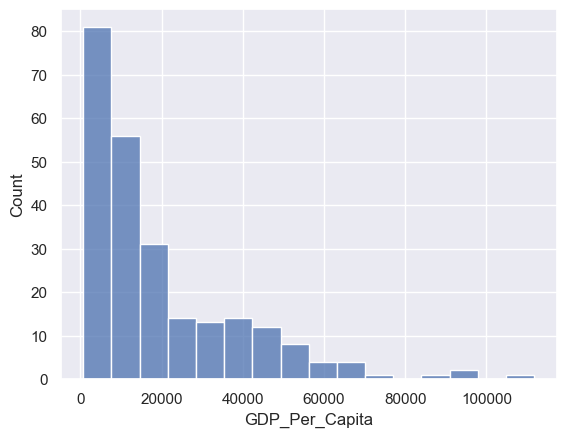

In [175]:
sns.set_theme(style="darkgrid")

sns.histplot(gdp_df.GDP_Per_Capita.loc [gdp_df.Year == 2020])
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

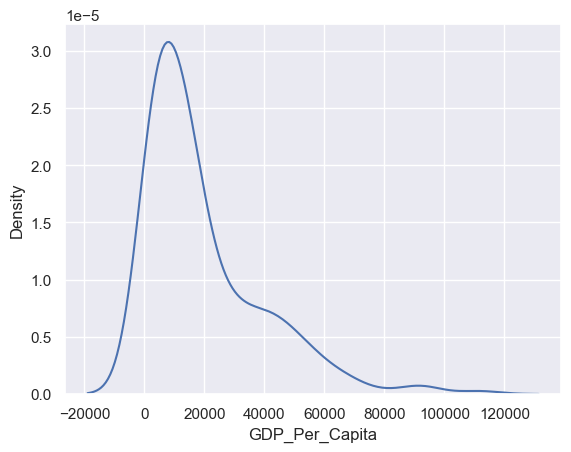

In [177]:
sns.kdeplot(gdp_df.GDP_Per_Capita.loc [gdp_df.Year == 2020])

<Axes: ylabel='GDP_Per_Capita'>

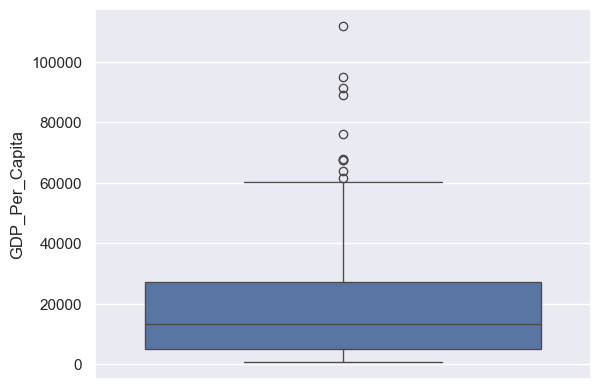

In [179]:
sns.boxplot(gdp_df.GDP_Per_Capita.loc [gdp_df.Year == 2020])

<Axes: ylabel='GDP_Per_Capita'>

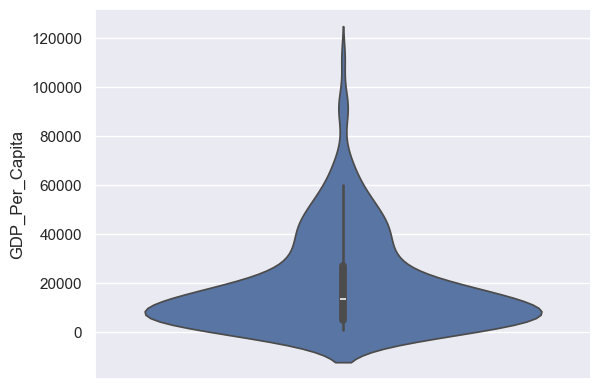

In [181]:
sns.violinplot(y=gdp_df.GDP_Per_Capita.loc [gdp_df.Year == 2020])

9. What was the median GDP per capita value in 2020?

In [183]:
round(gdp_df.GDP_Per_Capita.median(), 2)

10132.45

10. Compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. **GDP has been growing but most countries are at or below 20,000**


In [189]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

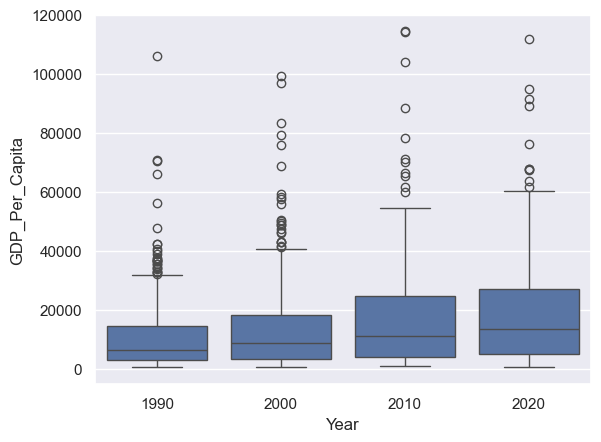

In [239]:
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

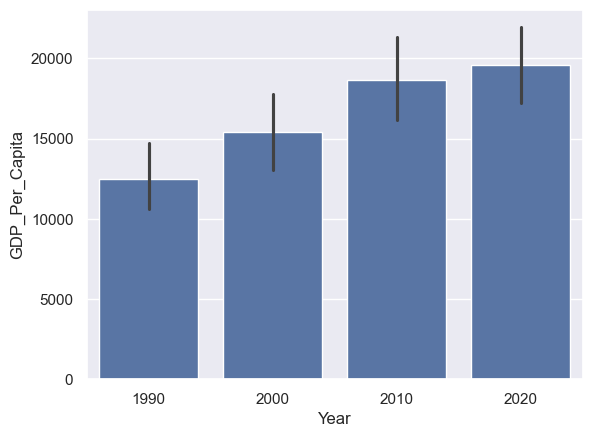

In [235]:
sns.barplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

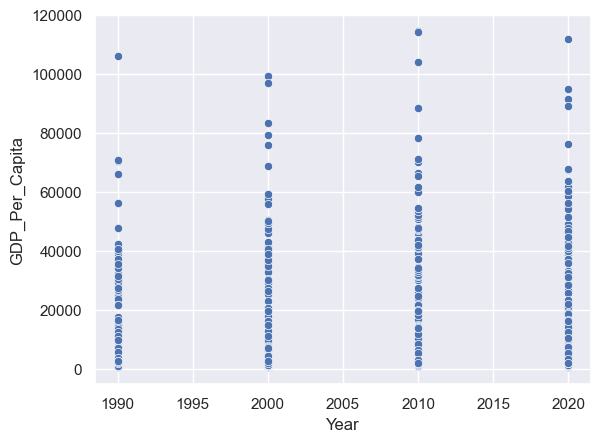

In [241]:
sns.scatterplot(data=gdp_decades, x="Year", y="GDP_Per_Capita")

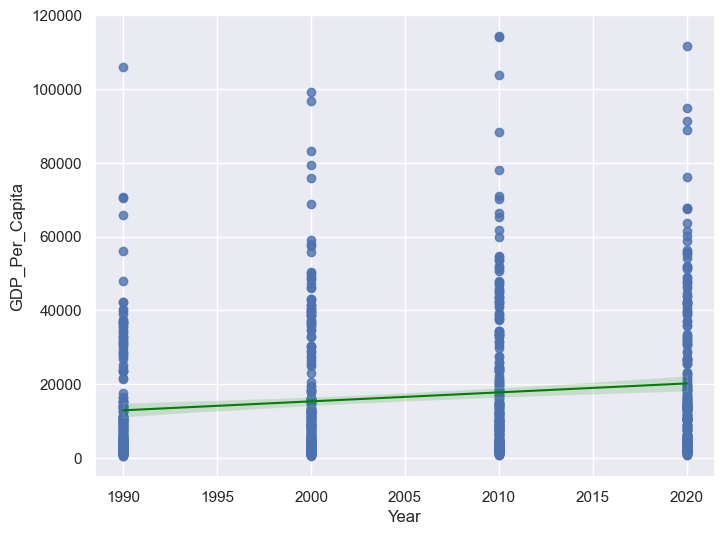

In [247]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "green", "linewidth": 1.5},
    ax=ax)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [253]:
first_gdp = gdp_df[gdp_df.GDP_Per_Capita > 100000].sort_values(by = 'Year', ascending = True)
first_gdp.head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [271]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [277]:
max_gdp = gdp_2020['GDP_Per_Capita'].max()
max_gdp

111751.3147513618

In [279]:
gdp_2020[gdp_2020['GDP_Per_Capita'] == max_gdp]

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [285]:
lux_df= gdp_decades.loc[gdp_decades['Country'] == 'Luxembourg'].sort_values(by = 'Year', ascending =True)
lux_df

,Country,Year,GDP_Per_Capita
4178,Luxembourg,1990,70860.819124
4168,Luxembourg,2000,99301.526999
4158,Luxembourg,2010,114343.988089
4148,Luxembourg,2020,111751.314751


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

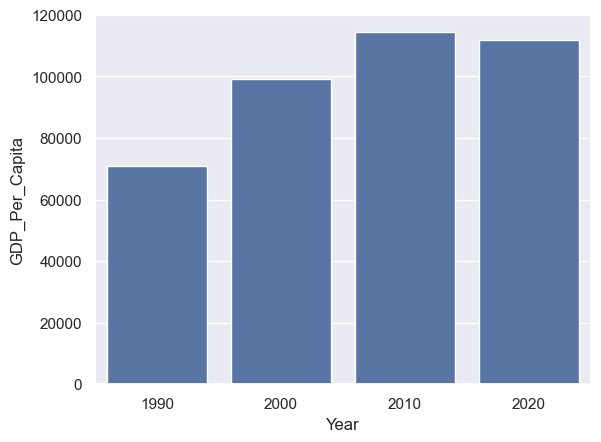

In [287]:
sns.barplot(x=lux_df['Year'], y=lux_df["GDP_Per_Capita"])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. 

In [289]:
min_gdp = gdp_2020['GDP_Per_Capita'].min()
min_gdp

711.355263423169

In [291]:
gdp_2020[gdp_2020['GDP_Per_Capita'] == min_gdp]

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [293]:
bur_df= gdp_decades.loc[gdp_decades['Country'] == 'Burundi'].sort_values(by = 'Year', ascending =True)
bur_df

,Country,Year,GDP_Per_Capita
1003,Burundi,1990,1175.155086
993,Burundi,2000,837.348411
983,Burundi,2010,804.354941
973,Burundi,2020,711.355263


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

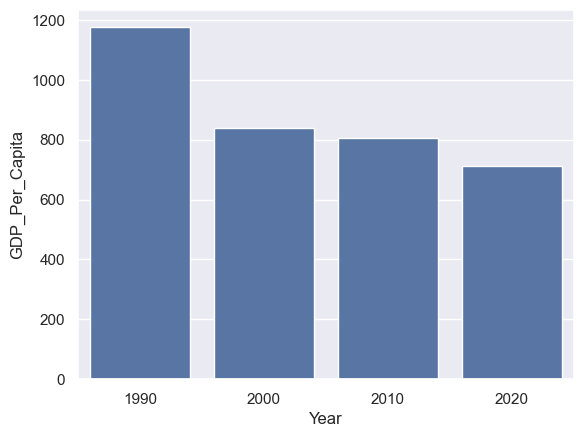

In [295]:
sns.barplot(x=bur_df['Year'], y=bur_df["GDP_Per_Capita"])

13.**Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. 

In [305]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [317]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             6083 non-null   object 
 1   Year                6083 non-null   int64  
 2   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 142.7+ KB


In [319]:
internet_df.describe()

,Year,Internet_Users_Pct
count,6083.000000,6083.000000
mean,2007.207135,29.655588
std,8.816584,31.381472
min,1990.000000,0.000000
25%,2000.000000,1.497090
50%,2007.000000,16.551000
75%,2015.000000,55.659950
max,2023.000000,100.000000


In [313]:
internet_df = internet_df.drop(columns = 'Value Footnotes')
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [315]:
internet_df=internet_df.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16.Look at the number of observations in this dataset per year. What do you notice?

In [321]:
internet_df.Year.value_counts()

Year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64